In [153]:
import pandas as pd

In [154]:
df=pd.read_csv('CTG.csv')

In [155]:
df

,LB,AC,FM,NSP
0,120,0.000,0.000,2
1,132,0.006,0.000,1
2,133,0.003,0.000,1
3,134,0.003,0.000,1
4,132,0.007,0.000,1
...,...,...,...,...
2121,140,0.000,0.000,2
2122,140,0.001,0.000,2
2123,140,0.001,0.000,2
2124,140,0.001,0.000,2


In [156]:
df.isnull().sum()

LB     0
AC     0
FM     0
NSP    0
dtype: int64

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
df_train,df_test= train_test_split(df,test_size=.2,random_state=100)

In [159]:
df_train_x=df_train.iloc[:,0:-1]
df_train_y=df_train.iloc[:,-1]

df_test_x=df_test.iloc[:,0:-1]
df_test_y=df_test.iloc[:,-1]




In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
dt=DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth= 4)

In [162]:
dt.fit(df_train_x,df_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

In [163]:
pred_dt=dt.predict(df_test_x)

In [164]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [165]:
confusion_matrix(pred_dt,df_test_y)

array([[184,   0,   1],
       [ 66,  41,   3],
       [ 83,  13,  35]], dtype=int64)

In [166]:
accuracy_score(df_test_y,pred_dt)

0.6103286384976526

In [167]:
dt.feature_importances_

array([0.47422507, 0.42874974, 0.09702519])

In [168]:
feature_imp=pd.DataFrame({'importance':dt.feature_importances_,'columns':df_train_x.columns})
feature_imp.sort_values('importance',ascending=False)

,importance,columns
0,0.474225,LB
1,0.428750,AC
2,0.097025,FM


In [169]:
df1=df

In [170]:
df1

,LB,AC,FM,NSP
0,120,0.000,0.000,2
1,132,0.006,0.000,1
2,133,0.003,0.000,1
3,134,0.003,0.000,1
4,132,0.007,0.000,1
...,...,...,...,...
2121,140,0.000,0.000,2
2122,140,0.001,0.000,2
2123,140,0.001,0.000,2
2124,140,0.001,0.000,2


# oversampling manually

In [171]:
df1_train,df1_test= train_test_split(df1,test_size=.2,random_state=100)

In [172]:
df1_train.shape

(1700, 4)

In [173]:
df1_train.NSP.value_counts()

1    1322
2     241
3     137
Name: NSP, dtype: int64

In [174]:
p3=df1_train[df1_train.NSP==3]

In [175]:
#p2=df1_train[df1_train.NSP==2]

In [176]:
df1_train1 = pd.concat([df1_train,p3,p3,p3,p3,p3,p3])

In [177]:
#df1_train1 = pd.concat([df1_train,p2,p2,p2,p2])

In [178]:
df1_train1.shape

(2522, 4)

In [179]:
df1_train1.NSP.value_counts()

1    1322
3     959
2     241
Name: NSP, dtype: int64

In [180]:
df1_train1_x=df1_train1.iloc[:,0:-1]
df1_train1_y=df1_train1.iloc[:,-1]

In [181]:
df1_test_x=df1_test.iloc[:,0:-1]
df1_test_y=df1_test.iloc[:,-1]

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [184]:
dt1.fit(df1_train1_x,df1_train1_y)

DecisionTreeClassifier(max_depth=4)

In [185]:
pred_dt1=dt1.predict(df1_test_x)

In [186]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [187]:
confusion_matrix(pred_dt1,df1_test_y)

array([[230,  11,   3],
       [ 14,  12,   2],
       [ 89,  31,  34]], dtype=int64)

In [188]:
accuracy_score(df1_test_y,pred_dt1)

0.647887323943662

In [189]:
33/39

0.8461538461538461

In [190]:
feature_imp=pd.DataFrame({'importance':dt.feature_importances_,'columns':df_train_x.columns})
feature_imp.sort_values('importance',ascending=False)

,importance,columns
0,0.474225,LB
1,0.428750,AC
2,0.097025,FM


In [191]:
# !pip install pydotplus
# !pip install six
# !pip install pydot
# !pip install Image
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from IPython.display import Image
from six import StringIO
import os
os.environ["PATH"] += os.pathsep + "/usr/bin/dot"

In [192]:
ctg_train_x_names = df1_train1_x.columns

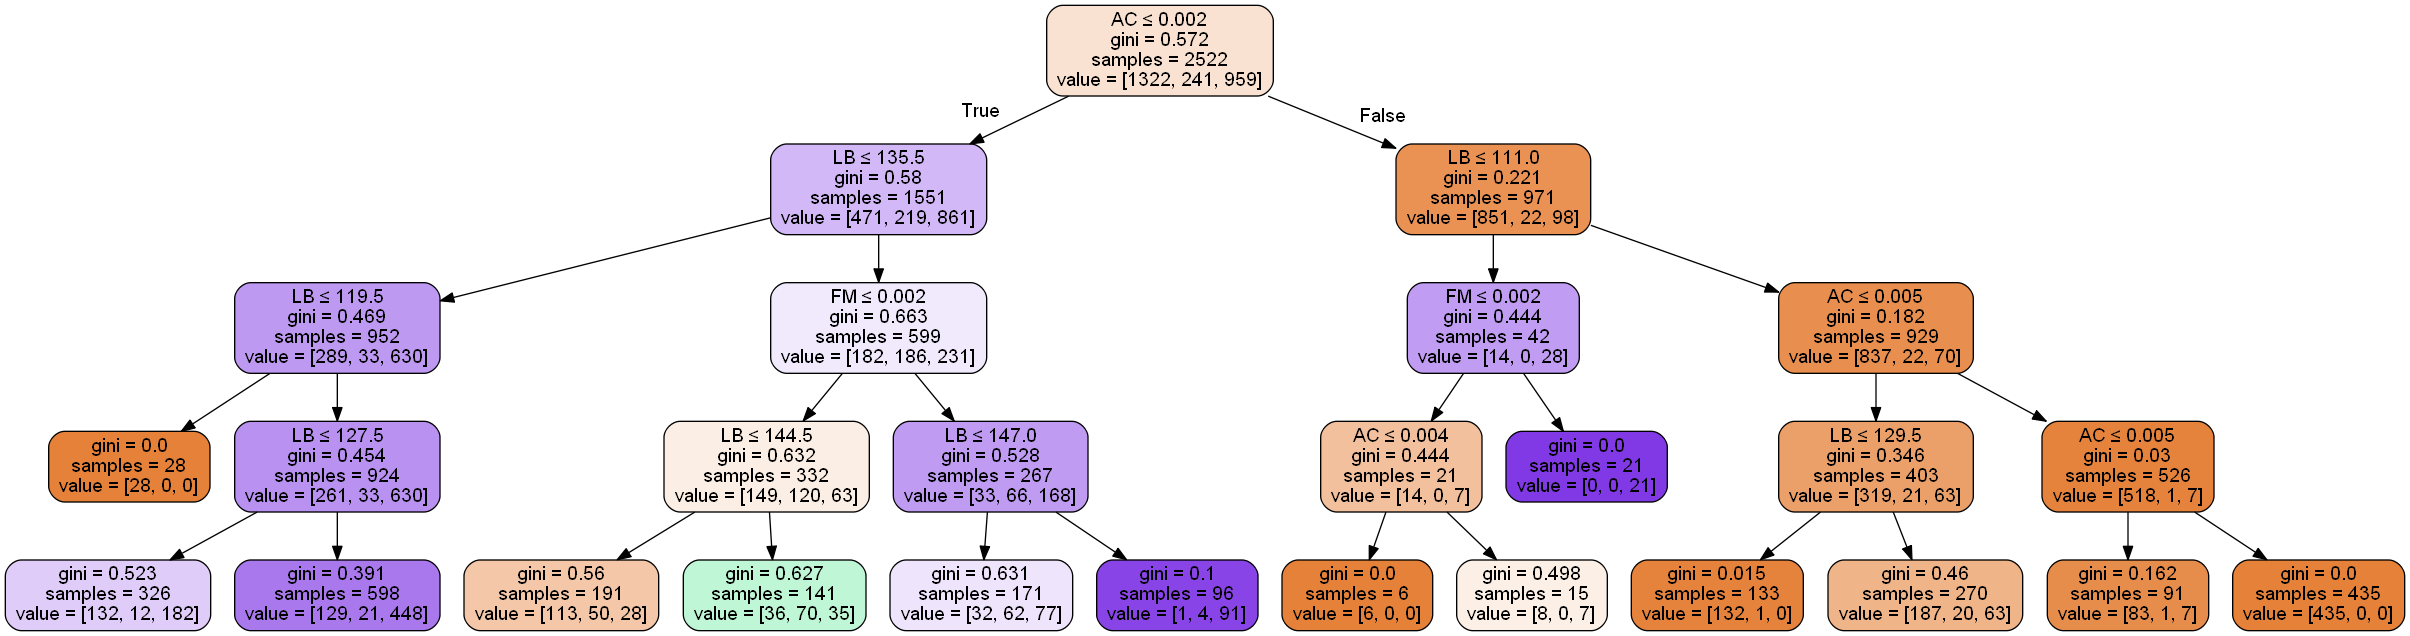

<Figure size 864x864 with 0 Axes>

In [193]:
dot_data = StringIO() ## creating a empty file
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt1, out_file=dot_data,
filled=True, rounded=True,
special_characters=True , feature_names=ctg_train_x_names)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Code for Grid Search

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
dtree = DecisionTreeClassifier()

In [217]:
search_dict = {'criterion' : ('entropy','gini'),
               'max_depth' : (4,5,6,7),
               'min_samples_split' : (50,75,100)}

In [218]:
grid = GridSearchCV(dtree, param_grid= search_dict)

In [219]:
grid.fit(df1_train1_x,df1_train1_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (4, 5, 6, 7),
                         'min_samples_split': (50, 75, 100)})

In [220]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 50}

In [221]:
pred_grid = grid.predict(df1_test_x)

In [222]:
confusion_matrix(pred_grid, df1_test_y)

array([[249,  15,   0],
       [ 18,  14,   4],
       [ 66,  25,  35]], dtype=int64)

# Random Forest

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
rfc = RandomForestClassifier(n_estimators= 100)

In [225]:
rfc.fit(df1_train1_x,df1_train1_y)

RandomForestClassifier()

In [226]:
pred_rfc = rfc.predict(df1_test_x)

In [227]:
confusion_matrix(pred_rfc, df1_test_y)

array([[283,  17,   0],
       [ 18,  22,   2],
       [ 32,  15,  37]], dtype=int64)

In [228]:
# how to decide which model should i use ??
# Answer its difficult to say which model will give me best result...i will create model using all possible algo and then deo
# decide based on confusion matrix( model performance ) which algo to be used

In [229]:
search_rfc = {'criterion' : ('entropy','gini'),
               'max_depth' : (4,5,6,7),
               'n_estimators' : (100, 150, 200)}

In [230]:
grid_rfc = GridSearchCV(rfc, param_grid = search_rfc)

In [210]:
grid_rfc.fit(df1_train1_x,df1_train1_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (4, 5, 6, 7),
                         'n_estimators': (100, 150, 200)})

In [211]:
# grid_rfc.best_params_

In [212]:
pred_grid_rfc = grid_rfc.predict(df1_test_x)

In [213]:
abc = confusion_matrix(pred_grid_rfc,  df1_test_y)
abc

array([[264,  14,   1],
       [ 12,  16,   2],
       [ 57,  24,  36]], dtype=int64)

In [214]:
abc.diagonal().sum()/abc.sum()

0.7417840375586855

In [231]:
# DT, RF, grid search and feature importance dataframe